# Tekst som data: Håndtering af tekstdata og ’text mining’

I dag ser vi på, hvordan tekster kan analyseres kvantitativt. Der introduceres diverse "text mining"-teknikker samt usuperviseret maskinlæring i form af latent dirichlet allocation til at inddele tekster i temaer.

Der arbejdes med data fra Twitter og fra Reddit i løbet af sessionen

**Indhold**
1. Hvorfor beskæftige sig med tekst kvantitativt?
2. Tekst og maskinlæring
3. Håndtering af tekst (strings) i Python
4. Bearbejdning/"pre-processing" af tekst (tokenization)
5. Tokenization med sprogmodeller
6. Simple text mining teknikker
7. Introduktion til topic modelling med latent dirichlet allocation (LDA)

# 1. Hvorfor beskæftige sig med tekst kvantitativt?

Tekst har altid været en yderst relevant datakilde for samfundsvidenskaberne; om så det gælder artikler, interviewtransskriberinger, juridiske dokumenter, nyheder eller andet. 

Derudover produceres der uanede mængder af tekstdata fra sociale medier som Facebook, Twitter, Reddit osv. Internettet og sociale medier er i dag unægteligt forbundet til det sociale liv. 

**Udfordringen med tekstdata**

Fra et analytisk synspunkt er der to primære udfordringer med tekst: volumen (der er rigtig meget af det) og formatet (det er ustruktureret). I samfundsvidenskaberne har man derfor længe opgivet kvantitativ analyse af tekst, da de kvantitative metoder, som oftest anvendes i samfundsvidenskaberne, ikke egner sig til denne type data. Som konsekvens deraf, har tekstdata automatisk været forbundet med kvalitativ analyse.

Kvalitativ analyse kan dog ikke håndtere udfordringen om volumen: Et menneske kan ikke alene behandle så meget information. Behandling af store datamængder er netop det computerteknologi hjælper os med, og i dag findes der også mange teknikker til at analysere tekstdata med kvantitative teknikker. Dog kan det diskuteres, om disse (på nuværende tidspunkt) kan tjene som en erstatning for den kvalitative forskning, eller om teknikkerne kan bidrage til at kvalificere, validere eller informere kvalitativ forskning. 

**Muligheder med kvantitative/computationelle metoder**

Selvom der i dag findes mange metoder og teknikker til at behandle tekst, så er brugen af disse til at bedrive samfundsvidenskabelig forskning stadig ikke særlig udbredt. Det betyder på den ene side, at der er mange uudforskede muligheder derude, men det betyder også, at der ikke er etableret faste traditioner for brug af disse metoder, og der er ej heller konsensus om, hvordan output af maskinlæringsmodeller brugt på tekst skal tolkes epistemologisk.

Formålet med dagens lektion er at introducere til brug af kvantiative metoder på tekst, men der argumenteres ikke for, at disse kan erstatte den kvalitative forskning. 

# 2. Tekst og maskinlæring

Overordnet set hjælper maskinlæring på tekst med én ting: klassifikation. 

*Superviseret* maskinlæring kan hjælpe med at klassificere tekst efter kategorier, som er kendte af forskeren. Her listes nogen eksempler på brug af superviseret maskinlæring på tekst:
- Sentiment analysis: Kategorisering af tekst efter udtryke følelser (fx positiv/negativ)
- Named Entity Recognition (NER): Identificering af nøgleoplysninger i tekst (fx navne, virksomheder)
- Generel klassificering: Hvad handler tekststykket om?
- Brug af sprogmodeller: Sætningskonstruktion, tekstopbygning

Fælles for superviseret maskinlæring på tekst er, at modeller skal gives information om, hvordan kategorier ser ud i teksten. Dette sker ofte gennem manuel kategorisering/annotering (kaldes også at træne en model).

*Usuperviseret* maskinlæring kan hjælpe os med at klassificere tekst efter kategorier, som *ikke* er kendt af forskeren. Det inkluderer blandt andet:
- Klyngeanalyser: Gruppering efter ensartethed af teksten
- Topic models: Udledning af underliggende emner i teksten
- Netværksanalyser: Ord i kontekst analyseret som netværk (visuelt)
- Word embedding teknikker: Analyse af ords betydning gennem deres kontekst (computationelt)


Fælles for usuperviseret maskinlæring på tekst er, at de de gives minimalt input ift. at kunne producere et output, der hjælper til at kategorisere eller inddele data. Dog er disse teknikker typisk meget sårbare over for måden, som man har forudbehandlet data (vil ikke ord man har frasorteret, fx).

## "Natural language processing" og "text mining"

Man støder på to hovedtermer, når man arbejder kvantitativt med tekst: "Natural language processing" og "text mining". De to termer bruges lidt synonymt, men er bundet op på lidt forskellige traditioner og ophav. 

***"Natural language processing" (NLP)*** er først og fremmest en computervidenskabelig disciplin. Det er en disciplin, der beskæftiger sig med at få en computer til at forstå menneskeligt sprog (talt eller skrevet). Tale-til-tekst applikationer, stemmestyring, autocorrect er alle sammen baseret på natural language processing teknikker. 

Hvis I vil se et eksempel på førende NLP-teknologi i aktion, kan I tage et kig på [AI Dungeon](https://play.aidungeon.io/).

***"Text mining"*** er primært et dataanalyse-term, der referer til metoder og teknikker, som udleder indhold, mønstre osv. i tekstdata. Meget text mining gør dog brug af NLP, da det er teknikkerne udviklet i NLP, der hjælper os til at få computeren til at forstå teksten, som vi undersøger.

## Text mining workflow i Python: Et eksempel

Herunder ses et eksempel på et text mining workflow i Python.

Det indeholder følgende:
- Import af relevante pakker
- Indlæsning af data
- Definere tokenizer funktion (med `stanza`)
- Tokenize tekstdata
- Konverter data til tidy format
- Ordoptælling (her hyppigste termer i tweets fordelt på parti)
- Konvertering af data fra tokens-lister til "gensim corpus" (krævet data format til at lave en topic model)
- Topic model på tweets baseret på "gensim corpus"

In [2]:
# Import af pakker

import ast
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import stanza
from nltk.corpus import stopwords
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Sæt visualiseringsindstillinger
%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

# Sæt sprogmodel
#stanza.download('da')
nlp = stanza.Pipeline('da', processors = 'tokenize, pos, lemma')

2021-03-11 09:47:35 INFO: Loading these models for language: da (Danish):
| Processor | Package |
-----------------------
| tokenize  | ddt     |
| pos       | ddt     |
| lemma     | ddt     |

2021-03-11 09:47:35 INFO: Use device: cpu
2021-03-11 09:47:35 INFO: Loading: tokenize
2021-03-11 09:47:35 INFO: Loading: pos
2021-03-11 09:47:36 INFO: Loading: lemma
2021-03-11 09:47:36 INFO: Done loading processors!


In [3]:
# Indlæsning af data
tweetdata_url = "https://raw.githubusercontent.com/CALDISS-AAU/course_ndms-I/master/datasets/poltweets_sample.csv"
tweets_df = pd.read_csv(tweetdata_url)
tweets_df.shape

(5500, 13)

In [11]:
# Definer tokenizer
def tokenizer_stanza(text): # Definerer funktion ud fra koden fra tidligere
    custom_stops = ["@", "god", "al", "stor", "ny", "tak", "dag"]
    stop_words = list(stopwords.words('danish')) + custom_stops
    pos_tags = ['PROPN', 'ADJ', 'NOUN']

    doc = nlp(text)

    tokens = []

    for sentence in doc.sentences:
        for word in sentence.words:
            if (word.lemma.startswith("@")) or (word.lemma.startswith("#")) or (len(word.lemma) < 3):
                continue
            if (word.pos in pos_tags) and (word.lemma not in stop_words):
                tokens.append(word.lemma)
                
    return(tokens)

In [12]:
# Anvend tokenizer på data (tager lang tid, så indlæs i forvejen tokenized data)
#tweets_df['tokens'] = tweets_df['full_text'].apply(tokenizer_stanza)

In [13]:
# Indlæs tokenized data, hvis nødvendigt
tweets_df = pd.read_csv("https://raw.githubusercontent.com/CALDISS-AAU/course_ndms-I/master/datasets/poltweets_sample_tokens.csv")
tweets_df['tokens'] = tweets_df['tokens'].apply(ast.literal_eval)

In [14]:
# Data til tidy format
tweets_df_tidy = tweets_df.explode('tokens')

# Optælling af top 10 tokens for hvert parti
for party in tweets_df_tidy['party'].unique():
    print(f"----Top 10 tokens for {party.upper()}----\n")
    print(tweets_df_tidy.loc[tweets_df_tidy['party'] == party, 'tokens'].value_counts()[0:10])
    print("\n")

----Top 10 tokens for ALTERNATIVET----

æalternativ          271
alternativ            41
ådkgre                32
grøn                  19
regering              18
kontanthjælpsloft     16
arbejde               14
social                14
kommune               13
barn                  13
Name: tokens, dtype: int64


----Top 10 tokens for DANSK FOLKEPARTI----

Danmark      32
dansk        31
regering     23
dansker      17
folketing    16
gang         15
ådkmedie     13
land         13
klar         12
politi       12
Name: tokens, dtype: int64


----Top 10 tokens for DET KONSERVATIVE FOLKEPARTI----

regering          23
konservativedk    23
dansk             17
enig              14
debat             14
svær              13
Spolitik          12
gang              12
barn              12
Danmark           12
Name: tokens, dtype: int64


----Top 10 tokens for ENHEDSLISTEN----

enhedsliste    47
ådkgre         38
regering       38
vigtig         24
grøn           21
brug           19
penge 

In [15]:
# Konverter tweets til gensim corpus
tweets_tokens = list(tweets_df['tokens'])
id2token = corpora.Dictionary(tweets_tokens) # integer id per word
tweets_corpus = [id2token.doc2bow(tokens) for tokens in tweets_tokens] # bag-of-word(bow) tuples for hver text - (token-id, optælling)

# Bygger LDA model
lda_model = LdaModel(corpus=tweets_corpus,  # Corpus af tekster
                    id2word=id2token,       # Dictionary af ord-id mapping
                     num_topics=10,          # Antal topics
                     random_state=142)       # Sætter seed - sikrer samme resultat

In [16]:
# Viser mest sandsynlige ord per topic
pprint(lda_model.show_topics(formatted=False)) # Viser de 10 mest sandsynlige ord per topic

[(0,
  [('barn', 0.015348121),
   ('dansker', 0.014420722),
   ('forslag', 0.013904027),
   ('grøn', 0.0104087265),
   ('æalternativ', 0.009762152),
   ('krone', 0.008521342),
   ('æpolitike', 0.007819451),
   ('Danmark', 0.0073938933),
   ('milliard', 0.0068046297),
   ('dansk', 0.0066727786)]),
 (1,
  [('statsminister', 0.014149268),
   ('dansk', 0.012120125),
   ('tid', 0.008486022),
   ('Mette', 0.0084452415),
   ('blå', 0.0074493317),
   ('regering', 0.00723349),
   ('Danmark', 0.0066042966),
   ('ådkmedie', 0.006548232),
   ('eksempel', 0.0063753626),
   ('fald', 0.006153699)]),
 (2,
  [('vigtig', 0.009171487),
   ('høj', 0.008916648),
   ('Heunicke', 0.00875799),
   ('PiaOlsen', 0.005994602),
   ('enig', 0.0059861997),
   ('København', 0.0049922136),
   ('stemme', 0.0047079087),
   ('opmærksom', 0.0044500213),
   ('JanEJoergensen', 0.00441539),
   ('uge', 0.004310147)]),
 (3,
  [('Danmark', 0.0111359395),
   ('regering', 0.009739467),
   ('første', 0.00761231),
   ('natur', 0.00

# 3. Håndtering af tekst (strings) i Python

Lad os først se på, hvordan man arbejder med enkelte tekstværdier i Python.

Vi starter med at importere de pakker vi kender til at importere data og visualisere. Derefter importerer vi de datasæt, som vi skal arbejde med i dag.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

In [8]:
tweetdata_url = "https://raw.githubusercontent.com/CALDISS-AAU/course_ndms-I/master/datasets/poltweets_sample.csv"
tweets_df = pd.read_csv(tweetdata_url)

redditdata_url = "https://raw.githubusercontent.com/CALDISS-AAU/course_ndms-I/master/datasets/reddit_rdenmark-comments_01032021-08032021_long.csv"
reddit_df = pd.read_csv(redditdata_url)

**Datasæt 1: Danske politikere på Twitter**

Det første datasæt er en samling af tweets fra danske folketingspolitikere. Der er tweets fra perioden 1/1/2015 - 27/1/2021. Data er et sample bestående af 500 tilfædige tweets per danske parti i den periode. Personlige oplysninger i form af brugernavn, placering og brugerbeskrivelser er fjernet fra data.

Dette datasæt bliver brugt i de fleste eksempler i løbet af dagens session.

In [9]:
tweets_df.head()

,created_at,id,full_text,is_quote_status,retweet_count,favorite_count,favorited,retweeted,is_retweet,hashtags,urls,user_followers_count,party
0,2020-10-21 14:48:39+00:00,1318927184111730700,Er på vej i miljøministeriet for at foreslå at...,False,13,47,False,False,False,['dkgreen'],[],4064,Alternativet
1,2019-06-02 20:03:20+00:00,1135275725592891400,@nielscallesoe @helenehagel @alternativet_ Det...,False,0,1,False,False,False,[],[],4064,Alternativet
2,2016-03-10 09:07:52+00:00,707855478320189400,"Vi står sammen, smiler Løkke på KL-topmøde og ...",False,13,14,False,False,False,"['dkpol', 'KLtop16']",[],4064,Alternativet
3,2019-04-07 19:59:03+00:00,1114980930467315700,@AnnaBylov @EU_Spring @rasmusnordqvist 💚,False,0,2,False,False,False,[],[],4064,Alternativet
4,2017-05-28 09:59:26+00:00,868768670427828200,Der er ikke noget alternativ til at Alternativ...,False,6,28,False,False,False,['LMÅ17'],"[{'url': 'https://t.co/3MCdZZGKRq', 'expanded_...",4064,Alternativet


**Datasæt 2: Kommentarer fra Reddit (r/denmark)**

Det andet datasæt er et udtræk af Reddit-opslag med kommentarer fra subreddit [r/denmark](https://www.reddit.com/r/Denmark/). Udtrækket består af opslag fra 1/3/2021-8/3/2021 med mere end 15 kommentarer på udtrækstidspunktet (8/3/2021).

Dette datasæt bliver brugt i dagens øvelser.

In [10]:
reddit_df.head()

,post_author,post_created_utc,post_domain,post_full_link,post_gildings,post_id,post_is_original_content,post_is_reddit_media_domain,post_locked,post_media_only,...,comment_is_submitter,comment_link_id,comment_parent_id,comment_permalink,comment_retrieved_on,comment_score,comment_stickied,comment_subreddit,comment_subreddit_id,comment_total_awards_received
0,MadsenFraMadsenOgCo,1614698948,berlingske.dk,https://www.reddit.com/r/Denmark/comments/lw4k...,{},lw4koj,False,False,False,False,...,False,t3_lw4koj,t3_lw4koj,/r/Denmark/comments/lw4koj/pfizer_med_opjuster...,1614699643,1,False,Denmark,t5_2qjto,0
1,MadsenFraMadsenOgCo,1614698948,berlingske.dk,https://www.reddit.com/r/Denmark/comments/lw4k...,{},lw4koj,False,False,False,False,...,False,t3_lw4koj,t1_gpfa37s,/r/Denmark/comments/lw4koj/pfizer_med_opjuster...,1614700857,1,False,Denmark,t5_2qjto,0
2,MadsenFraMadsenOgCo,1614698948,berlingske.dk,https://www.reddit.com/r/Denmark/comments/lw4k...,{},lw4koj,False,False,False,False,...,False,t3_lw4koj,t1_gpfcfj3,/r/Denmark/comments/lw4koj/pfizer_med_opjuster...,1614702086,1,False,Denmark,t5_2qjto,0
3,MadsenFraMadsenOgCo,1614698948,berlingske.dk,https://www.reddit.com/r/Denmark/comments/lw4k...,{},lw4koj,False,False,False,False,...,False,t3_lw4koj,t1_gpfesm5,/r/Denmark/comments/lw4koj/pfizer_med_opjuster...,1614702455,1,False,Denmark,t5_2qjto,0
4,MadsenFraMadsenOgCo,1614698948,berlingske.dk,https://www.reddit.com/r/Denmark/comments/lw4k...,{},lw4koj,False,False,False,False,...,False,t3_lw4koj,t1_gpffidu,/r/Denmark/comments/lw4koj/pfizer_med_opjuster...,1614702670,1,False,Denmark,t5_2qjto,0


## String metoder

En tekstværdi kaldes en "string" inden for programmeringssprog. For at arbejde med tekst, er det relevant at vide, hvordan Python kan arbejde med enkelte tekstværdier.

Vi ser herunder nærmere på indbyggede string-metoder i Python


In [11]:
tweet = tweets_df.loc[584, 'full_text']
print(tweet)

Hjemmeværnet, Politikadetterne og Forsvaret klarer ærterne ved grænserne, så Politiet kan kaste sig over at gøre danskere mere trygge. Sikker på,at @ClausOxfeldt bliver lykkelig for vort krav. Han har jo brugt megen energi på at give DFs grænseindsats skylden for mandskabsmangel. https://t.co/PgenOdeSwn


In [12]:
type(tweet)

str

In [13]:
tweet.startswith("Hjemmeværn")

True

In [14]:
tweet.endswith("DF")

False

In [15]:
"energi" in tweet

True

In [16]:
"politi" in tweet # findes ikke, da politi står med stort

False

In [17]:
"politi" in tweet.lower()

True

In [10]:
tweet.upper()

'HJEMMEVÆRNET, POLITIKADETTERNE OG FORSVARET KLARER ÆRTERNE VED GRÆNSERNE, SÅ POLITIET KAN KASTE SIG OVER AT GØRE DANSKERE MERE TRYGGE. SIKKER PÅ,AT @CLAUSOXFELDT BLIVER LYKKELIG FOR VORT KRAV. HAN HAR JO BRUGT MEGEN ENERGI PÅ AT GIVE DFS GRÆNSEINDSATS SKYLDEN FOR MANDSKABSMANGEL. HTTPS://T.CO/PGENODESWN'

## String metoder i pandas

Mange string metoder kan anvendes på pandas series - ofte ved at tilføje `.str`

In [18]:
tweets_df['full_text'].str.startswith("Hjemmeværn").head()

0    False
1    False
2    False
3    False
4    False
Name: full_text, dtype: bool

In [19]:
tweets_df['full_text'].str.startswith("Hjemmeværn").sum() # Hvor mange tweets starter med hjemmeværn?

1

`str.contains()` på en pandas series svarer til at bruge `in` på en string.

In [13]:
tweets_df['full_text'].str.contains("DF").sum() # Hvor mange tweets taler om DF?

118

Fordi metoder som `str.startswith()` og `str.contains()` returnerer logiske værdier (`True`/`False`), så kan de bruges til subsetting.

In [14]:
DFtweets_df = tweets_df.loc[tweets_df['full_text'].str.contains("DF"), :]
DFtweets_df

,created_at,id,full_text,is_quote_status,retweet_count,favorite_count,favorited,retweeted,is_retweet,hashtags,urls,user_followers_count,party
36,2019-01-24 22:39:33+00:00,1088567004733341700,@RosenkrantzT @Spolitik @alternativet_ Det er ...,False,1,4,False,False,False,[],[],4064,Alternativet
375,2020-10-22 10:02:29+00:00,1319217553772859400,"Har igen, kl. 13 (sammen med V, K og DF) indka...",False,8,54,False,False,False,"['dkpol', 'dksocial']",[],4064,Alternativet
513,2019-12-12 13:56:01+00:00,1205124148260954000,Ifølge DR har i al fald den ene af de terror-s...,False,7,55,False,False,False,[],"[{'url': 'https://t.co/D6WhHzVVgu', 'expanded_...",12276,Dansk Folkeparti
515,2020-12-05 11:44:00+00:00,1335188170040897500,"Havde håbet på meget mere på ældreområdet, her...",False,3,4,False,False,False,['dkpol'],"[{'url': 'https://t.co/HYLZ24Z632', 'expanded_...",2748,Dansk Folkeparti
520,2018-08-08 13:23:10+00:00,1027183438510608400,"Spørgelysten var stor på det pressemøde, der t...",False,3,18,False,False,False,"['dkpol', 'FL19']",[],12276,Dansk Folkeparti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737,2018-11-30 22:19:14+00:00,1068630561709875200,“Alternativet er dybt politisk uenige i DF’s p...,False,0,2,False,False,False,"['dkpol', 'derforuffe', 'alternativet']",[],3109,Uden for folketingsgrupperne
4750,2020-07-08 17:40:44+00:00,1280919762999132200,@DonPeHa Fordi der hele tiden bliver hetzet im...,False,0,0,False,False,False,[],[],37443,Uden for folketingsgrupperne
5039,2017-01-26 08:26:32+00:00,824533970201223200,Til afrikansk topmøde Addis Ababa: Meget bekym...,False,19,41,False,False,False,"['globalgagrule', 'dk4hrc', 'dkpol']",[],5749,Venstre
5087,2019-04-11 08:11:51+00:00,1116252507360174100,På administration i sundhedsvæsenet bruger Dan...,False,30,176,False,False,False,"['dkpol', 'sundpol']",[],26669,Venstre


Dette subset kan vi visualisere, og dermed få et hurtigt overblik over, hvilke partier, der tweeter om "DF"

<AxesSubplot:xlabel='party'>

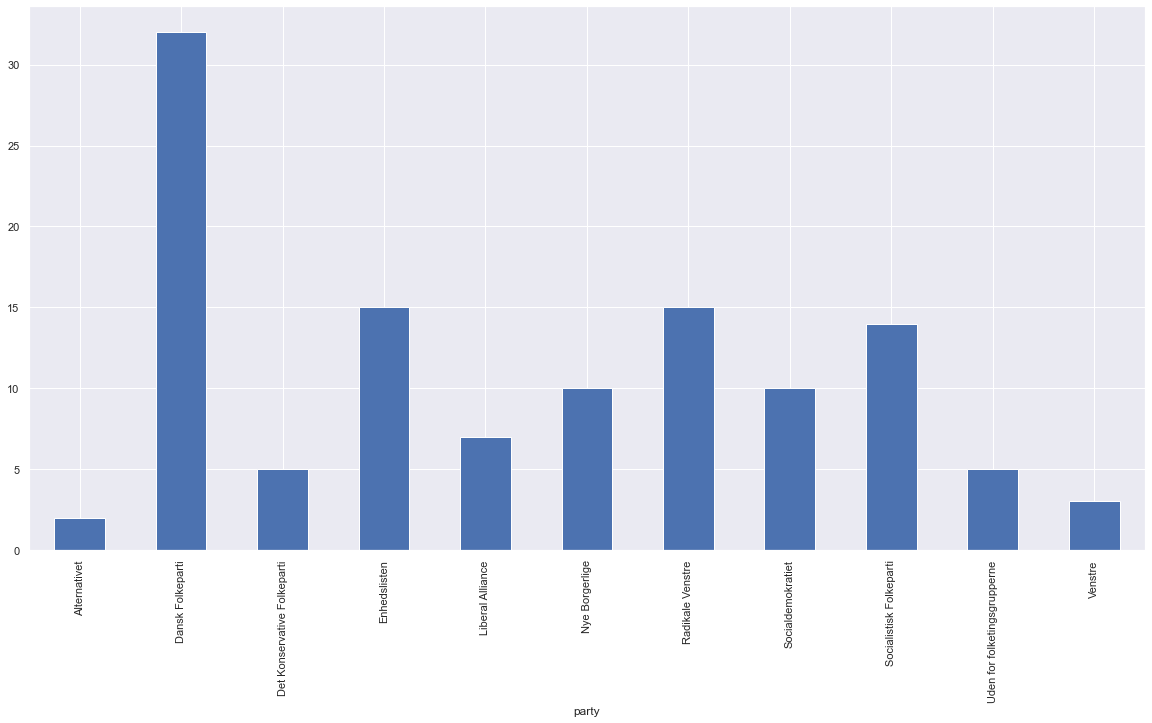

In [15]:
DFtweets_df.groupby('party').size().plot.bar()

# ØVELSE 1: Simpel teksthåndtering

I øvelserne i dag skal i arbejde med et datasæt bestående af kommentarer fra reddit. Alle kommentarer er taget fra posts på r/denmark (reddit.com/r/denmark) fra 1/3-8/3 2021.

1. Indlæs data som en pandas data frame
    - Link til data: https://raw.githubusercontent.com/CALDISS-AAU/course_ndms-I/master/datasets/reddit_rdenmark-comments_01032021-08032021_long.csv
2. Dan et subset bestående af alle kommentarer, der nævner "menneskerettigheder" (kommentarteksten er i kolonnen `comment_body`). Hvor mange kommentarer er der?

**Bonus**
- Kan du udregne gennemsnitsscore for de kommentarer, der nævner menneskerettigheder? (score fremgår af kolonnen `comment_score`)

# 4. Bearbejdning/"pre-processing" af tekst (tokenization)

At arbejde med hele rå strings er for det meste ikke særlig praktisk.

- Søgning på substrings matcher også, hvis det indgår inde i et ord (medmindre man bruger regular expression, som vi ikke kommer ind på her)
- Vanskeligt at identificere nøgleord / de mest brugte eller væsentligste ord i teksten
- Python adskiller mellem små og store bogstaver
- Vanskeligt at identificere ord i kontekst

Måden man løser mange disse udfordringer, er ved at behandle ordene i teksterne enkeltvis. På den måde gøres hvert enkelt ord til en analyseenhed. Processen i at omdanne tekst til enkeltord kaldes "tokenization", da de færdigbehandlede ord referes til som tokens. 

## Tokenization af tekst

Formålet med tokenization er at konvertere tekst til enkelte analyseenheder. I denne proces frasorteres også elementer i teksten, som umiddelbart ikke bidrager med noget meningsfuldt i en analyse af indholdet (fx tegnsætning, hvorvidt ordet er stavet med stort, fyldord som fx stedord osv.)

Tokenization indeholder typisk følgende skridt:

1. Opdeling af tekst i enkeltord
2. Frasortering af tegnsætning
3. Evt. konverter til små bogstaver
4. Frasorter stopord
5. Evt. konverter ord til deres stamme eller navneform

### Tokenization (med basisfunktioner)

Lad os først se på, hvordan vi kan implementere disse skridt enkeltvis med basisfunktioner for at se, hvordan teksten ændres skridt for skridt.

#### 1. Opdeling af tekst i enkeltord

Første skridt i tokenization er at omdanne teksten til en samling af enkeltord. På den måde er hver enkelt ord afgrænset, og vi kan holde styr på deres placering i teksten gennem deres indeks.

In [20]:
tweet = tweets_df.loc[584, 'full_text']
words = tweet.split(" ")

print(tweet)
print("\n")
print(words)

Hjemmeværnet, Politikadetterne og Forsvaret klarer ærterne ved grænserne, så Politiet kan kaste sig over at gøre danskere mere trygge. Sikker på,at @ClausOxfeldt bliver lykkelig for vort krav. Han har jo brugt megen energi på at give DFs grænseindsats skylden for mandskabsmangel. https://t.co/PgenOdeSwn


['Hjemmeværnet,', 'Politikadetterne', 'og', 'Forsvaret', 'klarer', 'ærterne', 'ved', 'grænserne,', 'så', 'Politiet', 'kan', 'kaste', 'sig', 'over', 'at', 'gøre', 'danskere', 'mere', 'trygge.', 'Sikker', 'på,at', '@ClausOxfeldt', 'bliver', 'lykkelig', 'for', 'vort', 'krav.', 'Han', 'har', 'jo', 'brugt', 'megen', 'energi', 'på', 'at', 'give', 'DFs', 'grænseindsats', 'skylden', 'for', 'mandskabsmangel.', 'https://t.co/PgenOdeSwn']


#### 2. Frasortering af tegnsætning

Tegnsætning er typisk "støj" i text mining teknikker, så det frasorteres typisk.

Her frasorteres tegnsætning ved at gå igennem hvert ord med et for loop og derefter gå igennem forskellige tegnsætninger (`punct_list`) i et for loop og erstatte dem med ingenting.

In [17]:
punct_list = [',', '-','.','?','!']

words_nopunct = []

for word in words:
    for punct in punct_list:
        word = word.replace(punct, "")
    words_nopunct.append(word)
    
words_nopunct = list(filter(None, words_nopunct))

print(words_nopunct)

['Hjemmeværnet', 'Politikadetterne', 'og', 'Forsvaret', 'klarer', 'ærterne', 'ved', 'grænserne', 'så', 'Politiet', 'kan', 'kaste', 'sig', 'over', 'at', 'gøre', 'danskere', 'mere', 'trygge', 'Sikker', 'påat', '@ClausOxfeldt', 'bliver', 'lykkelig', 'for', 'vort', 'krav', 'Han', 'har', 'jo', 'brugt', 'megen', 'energi', 'på', 'at', 'give', 'DFs', 'grænseindsats', 'skylden', 'for', 'mandskabsmangel', 'https://tco/PgenOdeSwn']


#### 3. Evt. konverter til små bogstaver

Et primært formål med tokenization er, at ord med samme semantiske betydning bliver identiske. Derfor konverteres ord typisk til små bogstaver for at ensrette tekstmaterialet.

I nogen tilfælde kan det dog give mening at gøre dette med det samme, så man nemmere kan identifcere egenavne.

In [18]:
words_lower = [word.lower() for word in words_nopunct]

print(words_lower)

['hjemmeværnet', 'politikadetterne', 'og', 'forsvaret', 'klarer', 'ærterne', 'ved', 'grænserne', 'så', 'politiet', 'kan', 'kaste', 'sig', 'over', 'at', 'gøre', 'danskere', 'mere', 'trygge', 'sikker', 'påat', '@clausoxfeldt', 'bliver', 'lykkelig', 'for', 'vort', 'krav', 'han', 'har', 'jo', 'brugt', 'megen', 'energi', 'på', 'at', 'give', 'dfs', 'grænseindsats', 'skylden', 'for', 'mandskabsmangel', 'https://tco/pgenodeswn']


#### 4. Frasorter stopord

Et andet formål med tokenization er, at vi står tilbage med analyseenheder (ord), som kan hjælpe os til at sige noget om indholdet i teksten. Alle sprog har ord, som ikke bærer en speciel semantisk betydning. Det kunne fx være stedord (den, det, en, et, jeg, der osv.) og bindeord (og, eller, også, efter, før osv.).

Disse ord kaldes 'stopord'.

Herunder definerer vi vores egen liste af stopord og frasorterer dem med et for loop og en if-betingelse:

In [19]:
stopwords = ['og', 'klarer', 'ved', 'så', 'kan', 'kaste', 'sig', 'over', 'at', 'gøre', 'mere', 'bliver', 
             'for', 'vort', 'han', 'har', 'jo', 'brugt', 'megen', 'på', 'give', 'for']

words_nostop = []

for word in words_lower:
    if word not in stopwords:
        words_nostop.append(word)
        
print(words_nostop)

['hjemmeværnet', 'politikadetterne', 'forsvaret', 'ærterne', 'grænserne', 'politiet', 'danskere', 'trygge', 'sikker', 'påat', '@clausoxfeldt', 'lykkelig', 'krav', 'energi', 'dfs', 'grænseindsats', 'skylden', 'mandskabsmangel', 'https://tco/pgenodeswn']


Udover stopord har vi også noget "twitter-støj"; fx links og brug af @ til at tagge andre brugere.

In [20]:
tokens = []

for word in words_nostop:
    if word.startswith("@") or word.startswith("https"):
        continue
    tokens.append(word)
    
print(tokens)

['hjemmeværnet', 'politikadetterne', 'forsvaret', 'ærterne', 'grænserne', 'politiet', 'danskere', 'trygge', 'sikker', 'påat', 'lykkelig', 'krav', 'energi', 'dfs', 'grænseindsats', 'skylden', 'mandskabsmangel']


#### 5. Evt. konverter ord til deres stamme eller navneform

Formålet med tokenization er både at frasortere støj i teksten og ensrette tokens sådan, at der kun er ét token for alle ord med samme semantiske betydning.

Fx er det uhensigtsmæssigt at behandle "Valgkamp" og "valgkamp" som to forskellige tokens, da det er det samme ord bare med stort og lille forbogstav.

Netop fordi hvert ord som udgangspunkt behanldes som unikt, giver det nogen udfordring ift. grammatik, da hver ordbøjning bliver hver sit token - medmindre man gør noget ved det!

Derfor er en typisk praksis enten at konvertere ordet til stammen (stemming). Her ville ord som "koste", "koster", "kostede" alle konverteres til "kost", da det er ordets stamme.

En anden praksis er at konvertere til navneformen (lemmatization). Her ville ord som "koste", "koster", "kostede" alle konverteres til "koste", da det er navneform for ordet.

Sådanne konverteringer kræver, at man bruger i forvejen trænede sprogmodeller, da stamme og navneform vil variere fra sprog til sprog. Heldigvis er der udviklet mange af disse værktøjer.

Dog er sådan nogen værktøjer ikke uden fejl, da det tager lang tid for en computer at lære, hvad forskellen er på "kost" (noget man spiser), "kost" (noget man fejer med) og "kost" (stammen at verbum "koste").

#### Tokenization som funktion

Det kan være en fordel at sammensætte ens pre-processing i en funktion. På den måde bliver den nemmere at genanvende.

In [22]:
def tokenizer_basic(text):
    punct_list = [',', '-','.','?','!']
    stopwords = ['og', 'klarer', 'ved', 'så', 'kan', 'kaste', 'sig', 'over', 'at', 'gøre', 'mere', 'bliver', 
                 'for', 'vort', 'han', 'har', 'jo', 'brugt', 'megen', 'på', 'give', 'for']

    words = text.split(" ")

    tokens = []

    for word in words:
        if word.startswith("@") or word.startswith("https"):
            continue

        for punct in punct_list:
            word = word.replace(punct, "")

        word = word.lower()

        if word not in stopwords:
            tokens.append(word)


    tokens = list(filter(None, tokens))

    return(tokens)

In [23]:
tokens = tokenizer_basic(tweet)

print(tweet)
print("\n")
print(words)

Hjemmeværnet, Politikadetterne og Forsvaret klarer ærterne ved grænserne, så Politiet kan kaste sig over at gøre danskere mere trygge. Sikker på,at @ClausOxfeldt bliver lykkelig for vort krav. Han har jo brugt megen energi på at give DFs grænseindsats skylden for mandskabsmangel. https://t.co/PgenOdeSwn


['Hjemmeværnet,', 'Politikadetterne', 'og', 'Forsvaret', 'klarer', 'ærterne', 'ved', 'grænserne,', 'så', 'Politiet', 'kan', 'kaste', 'sig', 'over', 'at', 'gøre', 'danskere', 'mere', 'trygge.', 'Sikker', 'på,at', '@ClausOxfeldt', 'bliver', 'lykkelig', 'for', 'vort', 'krav.', 'Han', 'har', 'jo', 'brugt', 'megen', 'energi', 'på', 'at', 'give', 'DFs', 'grænseindsats', 'skylden', 'for', 'mandskabsmangel.', 'https://t.co/PgenOdeSwn']


### Ord som series

Med teksten konverteret til tokens, kan vi nemmere behandle dem.

Ordene er lige nu i en liste, men de kan nemt konverteres til en pandas series, så vi kan bruger pandas metoder til at udforske tekstindholdet (selvfølgelig ikke så spændende på et enketl tweet):

In [23]:
tokens_series = pd.Series(tokens)

tokens_series.value_counts()

trygge              1
påat                1
politiet            1
mandskabsmangel     1
krav                1
energi              1
grænseindsats       1
sikker              1
politikadetterne    1
danskere            1
dfs                 1
skylden             1
lykkelig            1
grænserne           1
ærterne             1
hjemmeværnet        1
forsvaret           1
dtype: int64

# ØVELSE 2: Tokenization

Prøv at undersøge tekstindholdet af et af opslagene i redditdata: `post = reddit_df.loc[503, 'post_selftext']`

1. Tokenize opslaget - enten med en funktion eller trin for trin
2. Lav en ordoptælling ved at konvertere jeres tokens til en pandas series og bruge `.value_counts()`

In [24]:
post = reddit_df.loc[503, 'post_selftext']

# 5. Tokenization med sprogmodeller

Selvom man kan komme langt med basisfunktioner, så er der stadig mange ulemper:
- Vi er nødt til selv at definere tegnsætning eller stopord (disse kan dog importeres fra andre pakker)
- Vi har ikke en nem måde at konvertere til stamme eller navneform

Der findes mange eksisterende tokenizer-funktioner, som man nemt kan hente fra andre pakker. En meget populær teknik i dag er at gøre brug af sprogmodeller, da man så kan lade disse analysere teksternes opbygning og sætningskonstruktion, og dermed foretage tokenization på baggrund af dette.

Sprogmodeller findes i såkaldte "natural language processing" pakker; altså pakker, der netop er udviklet til at læse og forstå tekst.

Nogen af de mere populære pakker er [`spacy`](https://spacy.io/) og [`stanza`](https://stanfordnlp.github.io/stanza/). 

Vi gør i denne session brug af `stanza`, men funktionerne og opbygningen minder meget om `spacy`.

## Hvad er en sprogmodel?

En sprogmodel ("language model") er kort sagt en model til at forudsige ord. Der er tale om modeller, der er trænet til at forstå forskellige sprog, og kan derfor både bruges til at producere tekst på et bestemt sprog eller analysere opbygningen af en tekst.

Lidt forsimplet er en sprogmodel en model, som er trænet til at genkende ordtyper, entiteter og sætningskonstruktion, som derved kan prædiktere disse informationer i tekst på det samme sprog.

### Introduktion til `stanza` 

"Stanza" indeholder forskellige sprogmodeller - herunder en dansk sprogmodel.

Overordnet virker stanza ved, at man specificerer en sprogmodel samt nogen "processors", som modellen skal indeholde. 

Stanzas sprogmodeller indeholder blandt andet:
- Tokenizer (inddeling i enkeltord)
- Lemmatizer (konvertering til navneform)
- Part-Of-Speech tagging (POS-tagging) (identificering af ordtyper)
- dependency parsing (sætningskonstruktion)
- Named-Entity-Recognition (NER) (udledning af "named entities", fx personer og organisationer)*
- Sentiment analysis (udregning af sætnings-sentiment - positivt/negativt)*

*\*Disse processors findes ikke for den danske sprogmodel*

### Brug af stanza i Python

For at bruge `stanza` skal vi først importere pakken. Derefter henter vi den danske sprogmodel.

In [25]:
import stanza

#stanza.download('da')

Når sprogmodellen er hentet, kan vi bruge den ved først at definere et såkaldt "pipeline", der gør brug af sprogmodellen. Derefter kan vi lade sprogmodellen analysere teksten.

In [24]:
nlp = stanza.Pipeline('da') # Definerer model

doc = nlp(tweet) # Bruger model på tweet

2021-03-11 15:40:45 INFO: Loading these models for language: da (Danish):
| Processor | Package |
-----------------------
| tokenize  | ddt     |
| pos       | ddt     |
| lemma     | ddt     |
| depparse  | ddt     |

2021-03-11 15:40:45 INFO: Use device: cpu
2021-03-11 15:40:45 INFO: Loading: tokenize
2021-03-11 15:40:45 INFO: Loading: pos
2021-03-11 15:40:46 INFO: Loading: lemma
2021-03-11 15:40:46 INFO: Loading: depparse
2021-03-11 15:40:47 INFO: Done loading processors!


Når modellen anvendes på et stykke tekst, behandler den tekststykket med de forskellige processors, som er en del af sprogmodellen (som standard for dansk: tokenizer, part-of-speech tagging, lemmatizer og dependency parsing).

Outputtet (`doc`) indeholder de forskellige værdier, som er udledt af teksten, som attributes (et attribute for token, et for lemma, et for pos osv.).

Da `stanza` både inddeler tekst i sætninger og ord, skal vi både loope igennem sætninger og ord for at se resultatet.

Herunder ses de tokens, som modellen finder (`.text`):

In [25]:
for sentence in doc.sentences:
    for word in sentence.words:
        print(word.text)

Hjemmeværnet
,
Politikadetterne
og
Forsvaret
klarer
ærterne
ved
grænserne
,
så
Politiet
kan
kaste
sig
over
at
gøre
danskere
mere
trygge
.
Sikker
på,at
@
ClausOxfeldt
bliver
lykkelig
for
vort
krav
.
Han
har
jo
brugt
megen
energi
på
at
give
DFs
grænseindsats
skylden
for
mandskabsmangel
.
https://t.co/PgenOdeSwn


Herunder ses tokens som "lemmatized" (`.lemma`):

In [28]:
for sentence in doc.sentences:
    for word in sentence.words:
        print(word.lemma)

hjemmeværn
,
politikadet
og
forsvar
klare
ært
ved
grænse
,
så
politi
kunne
kaste
sig
over
at
gøre
dansker
mere
trygg
.
sikker
på,at
@
ClausOxfeldt
blive
lykkelig
for
vores
krav
.
han
have
jo
bruge
meget
energi
på
at
give
DF
grænseindsats
skyld
for
mandskabsmangel
.
https://t.co/PgenOdeSwn


Herunder ses token sammen med part-of-speech tag (`.pos`):

In [29]:
for sentence in doc.sentences:
    for word in sentence.words:
        print(word.text + ", " + word.pos)

Hjemmeværnet, NOUN
,, PUNCT
Politikadetterne, NOUN
og, CCONJ
Forsvaret, NOUN
klarer, VERB
ærterne, NOUN
ved, ADP
grænserne, NOUN
,, PUNCT
så, SCONJ
Politiet, NOUN
kan, AUX
kaste, VERB
sig, PRON
over, ADP
at, PART
gøre, VERB
danskere, NOUN
mere, ADV
trygge, ADJ
., PUNCT
Sikker, ADJ
på,at, ADP
@, PROPN
ClausOxfeldt, PROPN
bliver, AUX
lykkelig, ADJ
for, ADP
vort, DET
krav, NOUN
., PUNCT
Han, PRON
har, AUX
jo, ADV
brugt, VERB
megen, ADJ
energi, NOUN
på, ADP
at, PART
give, VERB
DFs, PROPN
grænseindsats, NOUN
skylden, NOUN
for, ADP
mandskabsmangel, NOUN
., PUNCT
https://t.co/PgenOdeSwn, X


Fordelen ved at bruge sprogmodeller er, at metoder til at tokenize er indbygget. Derudover kan vi nemt få lemma af vores tokens, da sprogmodellen netop kender sproget, og derfor kan gradbøje ordene i teksten.

Sprogmodeller hjælper os også til at finde de mere meningsfulde ord. Visse ordtyper (part-of-speech) er ofte "støj" fra et tekstanalyse-perspektiv; fx hjælpeord (AUX), stedord (PRON), forholdsord (ADP) og bindeord (CONJ).

Med en sprogmodel kan vi blot udvælge de ordtyper, som vi vil beholde.

I det nedenstående vises en alternativ måde at tokenize med brug af `stanza`. Derudover bruges en prædefineret stopordsliste fra pakken [`nltk`](https://www.nltk.org/):

In [30]:
from nltk.corpus import stopwords # Importer stopord fra nltk

custom_stops = ["@", "god", "al", "stor", "ny", "tak", "dag"] # Definerer kontekstspecifikke stopord
stop_words = list(stopwords.words('danish')) + custom_stops # Danner samlet stopordsliste - danske stopord fra nltk + kontekstspecifikke
pos_tags = ['PROPN', 'ADJ', 'NOUN'] # Definerer POS-tags som skal bevares: egenavne, adjektiver og navneord

doc = nlp(tweet) # Kører sprogmodel på tweet

tokens = [] # Tom liste til at fylde tokens i 

for sentence in doc.sentences: # Looper igennem hver sætning i tweet
    for word in sentence.words: # Looper igennem hvert ord i sætning
        if (word.lemma.startswith("@")) or (word.lemma.startswith("#")) or (len(word.lemma) < 3): # Sætter negative betingelser: ord skal ikke starte med @, #
            # Ord på mindre end 3 bogstaver frasorteres også fra - Bemærk at alle tager udgangspunkt i lemma
            continue # Bruges til at skippe ordet: hvis en af betingelserne i if-linjen er sand, gå videre til næste ord
        if (word.pos in pos_tags) and (word.lemma not in stop_words): # Tjek at ordets POS-tag indgår i listen af accepterede tags og at ordet ikke er stopord
            # Bemærk at denne betingelse nås kun for dem, som ikke opfylder betingelsen fra if-linjen før
            tokens.append(word.lemma) # Tilføj ordets lemma til tokens, hvis if-betingelse er opfyldt

print(tweet) # Print oprindelige tweet
print("\n")            
print(tokens) # Print tokens

Hjemmeværnet, Politikadetterne og Forsvaret klarer ærterne ved grænserne, så Politiet kan kaste sig over at gøre danskere mere trygge. Sikker på,at @ClausOxfeldt bliver lykkelig for vort krav. Han har jo brugt megen energi på at give DFs grænseindsats skylden for mandskabsmangel. https://t.co/PgenOdeSwn


['hjemmeværn', 'politikadet', 'forsvar', 'ært', 'grænse', 'politi', 'dansker', 'trygg', 'sikker', 'ClausOxfeldt', 'lykkelig', 'krav', 'energi', 'grænseindsats', 'skyld', 'mandskabsmangel']


### Tokenizer funktion med stanza

Ovenstående kan med fordel laves til en funktion, så vi nemt kan foretage sammen tokenization på andre tweets.

Samtidig genindlæses sprogmodellen, hvor vi udvælger specifikke processors. Dette gør behandlingen hurtigere, da den ellers kører igennem alle processor i sprogmodellen, når den bruges på en tekst, selvom vi ikke bruger det til noget:

In [31]:
nlp = stanza.Pipeline('da', processors = 'tokenize, pos, lemma') 

def tokenizer_stanza(text): # Definerer funktion ud fra koden fra tidligere
    custom_stops = ["@", "god", "al", "stor", "ny", "tak", "dag"]
    stop_words = list(stopwords.words('danish')) + custom_stops
    pos_tags = ['PROPN', 'ADJ', 'NOUN']

    doc = nlp(text)

    tokens = []

    for sentence in doc.sentences:
        for word in sentence.words:
            if (word.lemma.startswith("@")) or (word.lemma.startswith("#")) or (len(word.lemma) < 3):
                continue
            if (word.pos in pos_tags) and (word.lemma not in stop_words):
                tokens.append(word.lemma)
                
    return(tokens)

2021-03-10 14:42:59 INFO: Loading these models for language: da (Danish):
| Processor | Package |
-----------------------
| tokenize  | ddt     |
| pos       | ddt     |
| lemma     | ddt     |

2021-03-10 14:42:59 INFO: Use device: cpu
2021-03-10 14:42:59 INFO: Loading: tokenize
2021-03-10 14:42:59 INFO: Loading: pos
2021-03-10 14:43:00 INFO: Loading: lemma
2021-03-10 14:43:00 INFO: Done loading processors!


Funktionen kan nu bruges på tweets (eller andre strings):

In [32]:
tokens = tokenizer_stanza(tweet)

print(tweet)
print("\n")
print(tokens)

Hjemmeværnet, Politikadetterne og Forsvaret klarer ærterne ved grænserne, så Politiet kan kaste sig over at gøre danskere mere trygge. Sikker på,at @ClausOxfeldt bliver lykkelig for vort krav. Han har jo brugt megen energi på at give DFs grænseindsats skylden for mandskabsmangel. https://t.co/PgenOdeSwn


['hjemmeværn', 'politikadet', 'forsvar', 'ært', 'grænse', 'politi', 'dansker', 'trygg', 'sikker', 'ClausOxfeldt', 'lykkelig', 'krav', 'energi', 'grænseindsats', 'skyld', 'mandskabsmangel']


### Tokens som en pandas series

Ovenstående funktion returnerer en liste af tokens. Lister kan nemt konverteres til en pandas series. På den måde kan man bruge pandas metoder til at arbejde med tekst-værdierne.

I nedenstående laves en hurtig ordoptælling. Det giver selvfølgelig ikke meget mening for så kort en tekst, men ville også fungere på en langt længere tekst.

In [33]:
tokens_series = pd.Series(tokens)

tokens_series.value_counts()

grænseindsats      1
forsvar            1
ClausOxfeldt       1
politikadet        1
skyld              1
grænse             1
politi             1
lykkelig           1
dansker            1
ært                1
sikker             1
mandskabsmangel    1
energi             1
krav               1
trygg              1
hjemmeværn         1
dtype: int64

# ØVELSE 3: Meningsfulde tokens med stanza

Prøv at undersøge tekstindholdet af samme reddit opslag som før, men denne gang med brug af `stanza`: `post = reddit_df.loc[503, 'post_selftext']`

1. Skriv en tokenizer funktion, er bruger `stanza`
2. Tokenize opslaget med funktionen
3. Lav igen en ordoptælling ved at konvertere jeres tokens til en pandas series og bruge `.value_counts()`

# 6. Simple text mining teknikker

Indtil videre har vi arbejdet med enkelte tekststykker, men hvordan oversætter vi disse teknikker til større samlinger? (corpus)

En samling af dokumenter eller tekster, der bruges til at undersøge et bestemt tema eller en bestemt problemstilling, kaldes et *corpus* (et term fra lingvistik).

Der er forskellige dataformater til at arbejde med corpora kvantitativt. Et udbredt format er et "document-term-matrix" (dtm) eller et "term-document-matrix" (tdm). Et document-term-matrix er en tabel, hvor dokumenterne/teksterne udgør rækkerne og tokens udgør kolonner. Hver celle er så en tælling af et token inden for hvert dokument. Et "term-document-matrix" er det samme, men hvor tokens udgør rækker og dokumenter udgør kolonner. 

Et "document-term-matrix" er nyttigt og nødvendigt til forskellige modeller, men formatet egner sig ikke særlig godt til mere simple, eksplorative text mining teknikker. Dette fordi at det er vanskeligt at bevare anden information, som man har i teksterne, i det format (fx forfatter af teksten, udgivelsestidspunkt eller andet).

## Tidy text data

Et alternativt format er et såkaldt "tidy text" format. I dette format betragtes hver optræden af et token som en observation. I dette format foregår der ikke nogen form for opsummering eller optælling i selve dataformatet. I stedet splittes tokens i tekster ud i rækker, så man for hver optræden af et token kan kombinere det med de øvrige oplysninger, som man har i data.

Tilgangen er mindre udbredt i Python, men ses ofte brugt i R (se fx [Silge, J og D Robinson: "Text Mining with R: A Tidy Approach"](https://www.tidytextmining.com/)).

**Fordele:**
- Fastholder dokumenttilhør og andre relevante oplysninger
- Gør det nemt at arbejde med
- Vi kan bruge metoder, som vi kender fra at arbejde med struktureret data
    
**Ulemper:**
- Data fylder hurtigt meget
- Kan have effekt på beregningstiden
- Ikke kompatibelt med mange modeller (data skal måske konverteres igen for at passe med model)

## Fra text corpora til tidy text i Python

Python (og pandas) har flere funktioner, der gør det nemt at anvende funktioner på alle værdier i en kolonne. Twitterdata er lige nu læst ind som en dataframe, hvor selve tweetet fremgår af kolonnen `full_text`:

In [34]:
tweets_df['full_text'].head()

0    Er på vej i miljøministeriet for at foreslå at...
1    @nielscallesoe @helenehagel @alternativet_ Det...
2    Vi står sammen, smiler Løkke på KL-topmøde og ...
3             @AnnaBylov @EU_Spring @rasmusnordqvist 💚
4    Der er ikke noget alternativ til at Alternativ...
Name: full_text, dtype: object

Vi har allerede udviklet en funktion, der virker på et enkelt tekststykke. Da hver celle i kolonnen `full_text` består af et enkelt tekststykke (et tweet), kan funktionen derfor bruges på hvilken som helst celle i kolonnen:

In [35]:
tokens = tokenizer_stanza(tweets_df.loc[102, 'full_text'])

print(tweets_df.loc[102, 'full_text'])
print("\n")
print(tokens)

- Hvordan sikrer vi at forebyggelse og behandling af cannabismisbrug blandt unge bliver styrket gennem legalisering af cannabis i Danmark? 
Det var omdrejningspunktet i en to timers debat med dem, der har “hands on” på området, nemlig misbrugsbehandlerne. 💚@alternativet_  #dkpol https://t.co/DnxKEGk9Ab


['forebyggelse', 'behandling', 'cannabismisbrug', 'ung', 'legalisering', 'cannabis', 'Danmark', 'omdrejningspunkt', 'time', 'debat', 'on”', 'område', 'misbrugsbehandler', 'åæalternativ']


**Brug af `.apply()` på pandas series**

Funktionen virker ikke på hele kolonnen, da funktionen er lavet til at tage et enkelt tekststykke som input (og ikke en pandas series):

In [36]:
tokenizer_stanza(tweets_df['full_text'])

AssertionError: input should be either str, list or Document

Man kan dog nemt få Pandas til at køre den samme funktion over hver celle i en kolonne med metoden `.apply()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html?highlight=apply#pandas.Series.apply).

`.apply()` anvendes på en pandas series og tager en funktion som input. Metoden kan tænkes lig et for loop, hvor funktionen, som man angiver som input, anvendes på hver celle i kolonnen.

Herunder dannes en ny kolonne (`tokens`), som dannes ved at anvende funktionen på kolonnen `full_text` med `.apply()` (OBS: Dette kan tage noget tid):

In [38]:
tweets_df['tokens'] = tweets_df['full_text'].apply(tokenizer_stanza)

In [39]:
# Indlæs tokenized data, hvis nødvendigt
#import ast

#tweets_df = pd.read_csv("https://raw.githubusercontent.com/CALDISS-AAU/course_ndms-I/master/datasets/poltweets_sample_tokens.csv")
#tweets_df['tokens'] = tweets_df['tokens'].apply(ast.literal_eval)

**Fra tokens som lister til tokens som rækker**

Funktionen `tokenizer_stanza` returnerer en liste af tokens. Kolonnen `tokens` indeholder derfor listen af tokens for hver tekst:

In [40]:
tweets_df['tokens'].head()

0    [vej, miljøministerium, biodiversitetsmål, Dan...
1    [æalternativ, nettofordel, klima, boring, Nord...
2    [Løkke, KL-topmøde, milliard, kommune, æaltern...
3                                          [eu_spring]
4         [alternativ, alternativ, klima, æalternativ]
Name: tokens, dtype: object

Data er derfor ikke tidy, da vi ikke har et ord per række. Dette kan dog nemt opnås med metoden `.explode()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.explode.html#pandas.Series.explode). 

In [41]:
tweets_df_tidy = tweets_df.explode('tokens')

tweets_df_tidy.head(10)

,created_at,id,full_text,is_quote_status,retweet_count,favorite_count,favorited,retweeted,is_retweet,hashtags,urls,user_followers_count,party,tokens
0,2020-10-21 14:48:39+00:00,1318927184111730700,Er på vej i miljøministeriet for at foreslå at...,False,13,47,False,False,False,['dkgreen'],[],4064,Alternativet,vej
0,2020-10-21 14:48:39+00:00,1318927184111730700,Er på vej i miljøministeriet for at foreslå at...,False,13,47,False,False,False,['dkgreen'],[],4064,Alternativet,miljøministerium
0,2020-10-21 14:48:39+00:00,1318927184111730700,Er på vej i miljøministeriet for at foreslå at...,False,13,47,False,False,False,['dkgreen'],[],4064,Alternativet,biodiversitetsmål
0,2020-10-21 14:48:39+00:00,1318927184111730700,Er på vej i miljøministeriet for at foreslå at...,False,13,47,False,False,False,['dkgreen'],[],4064,Alternativet,Danmark
0,2020-10-21 14:48:39+00:00,1318927184111730700,Er på vej i miljøministeriet for at foreslå at...,False,13,47,False,False,False,['dkgreen'],[],4064,Alternativet,natur
0,2020-10-21 14:48:39+00:00,1318927184111730700,Er på vej i miljøministeriet for at foreslå at...,False,13,47,False,False,False,['dkgreen'],[],4064,Alternativet,land
0,2020-10-21 14:48:39+00:00,1318927184111730700,Er på vej i miljøministeriet for at foreslå at...,False,13,47,False,False,False,['dkgreen'],[],4064,Alternativet,natur
0,2020-10-21 14:48:39+00:00,1318927184111730700,Er på vej i miljøministeriet for at foreslå at...,False,13,47,False,False,False,['dkgreen'],[],4064,Alternativet,havs
0,2020-10-21 14:48:39+00:00,1318927184111730700,Er på vej i miljøministeriet for at foreslå at...,False,13,47,False,False,False,['dkgreen'],[],4064,Alternativet,ådkgre
0,2020-10-21 14:48:39+00:00,1318927184111730700,Er på vej i miljøministeriet for at foreslå at...,False,13,47,False,False,False,['dkgreen'],[],4064,Alternativet,NaturThor


Med data i tidy format, kan vi bruge pandas metoder til at udforske data. 

Optælling af ord:

In [42]:
tweets_df_tidy['tokens'].value_counts()[0:10]

æalternativ    301
regering       273
Danmark        234
dansk          200
barn           183
ådkgre         154
enig           145
vigtig         142
gang           140
Spolitik       127
Name: tokens, dtype: int64

Vi kan blandt bruge `.groupby()` og `.sort_values()` til at lave optællinger inden for forskellige grupperinger:

In [43]:
for party in tweets_df_tidy['party'].unique():
    print(f"----Top 10 tokens for {party.upper()}----\n")
    print(tweets_df_tidy.loc[tweets_df_tidy['party'] == party, 'tokens'].value_counts()[0:10])
    print("\n")

----Top 10 tokens for ALTERNATIVET----

æalternativ          271
alternativ            41
ådkgre                32
grøn                  19
regering              18
kontanthjælpsloft     16
arbejde               14
social                14
øCirlander            13
barn                  13
Name: tokens, dtype: int64


----Top 10 tokens for DANSK FOLKEPARTI----

Danmark      32
dansk        31
regering     23
dansker      17
folketing    16
gang         15
ådkmedie     13
land         13
glad         12
klar         12
Name: tokens, dtype: int64


----Top 10 tokens for DET KONSERVATIVE FOLKEPARTI----

konservativedk    23
regering          23
dansk             17
debat             14
enig              14
svær              13
Spolitik          12
Danmark           12
barn              12
gang              12
Name: tokens, dtype: int64


----Top 10 tokens for ENHEDSLISTEN----

enhedsliste    47
regering       38
ådkgre         38
vigtig         24
grøn           21
brug           19
penge 

Vi kan med dette format også nemt finde tweets, der indeholder bestemte ord med `.isin()`:

In [44]:
keywords = ['klima', 'miljø'] # Ord til at søge efter

tweets_df_tidy.loc[tweets_df_tidy['tokens'].isin(keywords), 'party'].value_counts() # Optælling af specifikke ord for hvert party

Enhedslisten                    15
Socialistisk Folkeparti         14
Alternativet                     8
Det Konservative Folkeparti      6
Liberal Alliance                 4
Socialdemokratiet                4
Radikale Venstre                 4
Dansk Folkeparti                 4
Uden for folketingsgrupperne     4
Venstre                          2
Nye Borgerlige                   2
Name: party, dtype: int64

Ovenstånde kan også plottes:

<AxesSubplot:>

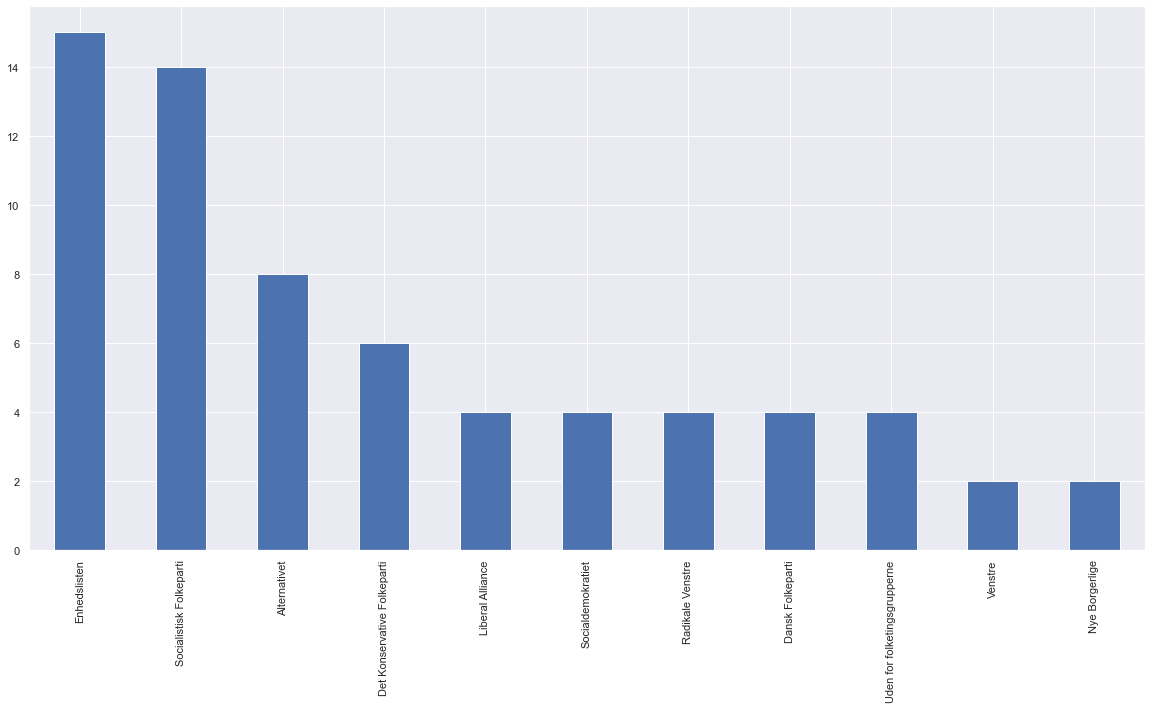

In [45]:
tweets_df_tidy.loc[tweets_df_tidy['tokens'].isin(keywords), 'party'].value_counts().plot.bar()

# ØVELSE 4: Tidy text data (reddit data)

Du skal nu anvende din funktion fra før på alle kommentarerne i reddit datasættet (kolonnen `comment_body`)

1. Brug `.apply()` til at anvende din tokenizer funktion på hele reddit datasættet til at lave en tokens kolonne (det kan være en god ide lige at teste funktionen med en enkelt kommentar først)
2. Brug `.explode()` til at konvertere data til et tidy format
3. Brug `.value_counts()` til at optælle tokens
4. Undersøg, hvor mange gange coronavirus er nævnt (tænkt gerne synonymer med!)

# 7. Introduktion til topic modelling med latent dirichlet allocation (LDA)

Indtil videre har vi kigget på teknikker, der hjælper os til at få et overblik over ordene, som indgår i data. Disse teknikker egner sig godt til det, som man kalder "nøgleordsanalyse"; altså en analyse af de mest centrale ord/termer i et corpus.

Vi kan dog også inddrage teknikker til at hjælpe os identificere umiddelbare mønstre og temaer i en samling af tekster.

"Latent Dirichlet Allocaltion" (LDA) ([Blei, David M. 2012](http://www.cs.columbia.edu/~blei/papers/Blei2012.pdf)): - en af de mest populære "topic models" - er en måde at anvende usuperviseret maskinlæring til at finde umiddelbare temaer i en tekst.

**Fordele**
- Giver overblik over umiddelbare tematiske mønstre i data
- Hjælper til at inddele og kategorisere tekstdata

**Ulemper**
- Fremgangsmåden præget af vilkårlighed (hvor mange topics, giver mening at finde?)
- Sårbar over for små ændringer i datahåndtering (hvorvidt man bruger lemmatizer, hvilke stopord man frasorterer)
- Ringe ekstern validitet: Modellen siger noget om den pågældende tekstsamling, men kan i ringe grade anvendes på andre tekstdata


## Hvordan fungerer topic modelling (LDA)?

LDA er en såkaldt "bag-of-words" model. Det vil først og fremmest sige, at den ikke tager højde for ordets sætningskontekst, men blot behandler en tekst som en samling af enkeltord.

### LDA kort fortal

![lda](./img/lda.png)

- Det antages, at der eksisterer et hvis antal "topics", der går igen på tværs af alle dokumenter i et corpus
- Et "topic" er en sandsynlighedsfordeling over en række ord; en samling af ord behæftet med en hvis sandsynlighed
- Hvert dokument antages at være sammensat af de forskellige topics; hvert topic er behæftet med en hvis sandsynlighed for at optræde i dokumentet
- Ordene i et dokument antages at være "trukket" af de forskellige topics

Lad os fx antage, at reddit kommentarer består af tre topics: konspiration, forretning og politik. Antagelsen i LDA er så, at en reddit kommentar er dannet ud fra en fordeling af disse topics. Det kunne fx være, at en kommentare er 40% konspiration, 25% forretning og 35% politik. Ord i en kommentar antages at være taget fra denne fordeling af topics. I hvert topic er visse ord mere sandsynlige end andre.

> Der er en ikke helt ude konspirations teori der bygger på at de store firmaer støttede det så de slap for at blive beskattet, ved at distrahere venstrefløjen.

### LDA som en "generativ probabilitisk model"

LDA er en "generativ probabilitisk model". Det vil sige, at data antages at blive dannet af en generativ proces over en sandsynlighedsfordeling, som er sammensat af *både* observerede og uobserverede variable ([Blei, David M. 2012](http://www.cs.columbia.edu/~blei/papers/Blei2012.pdf)).

De observerede variable for LDA er ordene i teksterne, mens de uoverserverede variable er de topics, som dokumenterne antages at være dannet af.

Sandsynlighedsfordelingen over ord og topics i en samling dokumenter noteres som følgende:

$$
p(\beta_{1:K}, \theta_{1:D}, z_{1:D}, w_{1:d})
$$
$$
= \prod_{i=1}^{K}p(\beta_i)\prod_{d=1}^{D}p(\theta_d)\Big(\prod_{n=1}^{N}p(z_{d,n}|\theta_d)p(w_{d,n}|\beta_{1:K},z_{d,n})\Big)
$$

- $\beta_{1:K}$ er topics,  hvor hvert $\beta_{k}$ er en sandsynlighedsfordeling af ord
- $\theta_{d,k}$ er topic-andel for topic $k$ for tekst $d$
- $z_{d,n}$ er tildeling af topic for $n$ ord i tekst $d$
- $w_{d,n}$ er observerede ord $n$ for dokument $d$


Da topic-strukturen er *uobserveret* variabel, kan modellen i sig selv ikke give svar på, hvilke emner, som der findes. Vi kan dog med modellen definere topic-strukturen ved at specificere et antal topics, hvorefter modellen så kan foretage beregningen for ords sandsynligheder i de enkelte topics og sandsynlighederne for topics i dokumenterne.

Der findes dog forskellige teknikker, der forsøger at løse problemet om at finde den optimale eller mest passende topic struktur.

## Brug af topic models i Python

I det følgende ser i på, hvordan vi kan lave en topic model model. Vi bruger pakken [`gensim`](https://radimrehurek.com/gensim/) til formålet.

`gensim` er en meget udbredt pakke til topic modelling. Dog er den ikke udviklet til at være kompatibel med `pandas`, hvorfor vi er nødt til at konvertere data til at være kompatibel med `gensim`.

Den datastruktur, som `gensim` skal bruge, er et "gensim corpus". Et "gensim corpus" er en liste af token-optællinger for hver tekst i et corpus. Sådan et corpus dannes ved først at konverteres tokens i corpus til et numerisk id (hvert token i corpus får unikt numerisk id). Derefter tælles antallet af tokens per tekst, og samles i tuples bestående af det numeriske id og antal hændelser i teksten.

### Fra tekster til gensim corpus

Til at starte med, skal vi bruge lister af tokens for hver tekst. Disse har vi allerede i vores dataframe (den, som ikke er konverteret til tidy). Vi kan derfor tage disse lister af tokens ud og arbejde med dem for sig.

In [46]:
tweets_df.head()

,created_at,id,full_text,is_quote_status,retweet_count,favorite_count,favorited,retweeted,is_retweet,hashtags,urls,user_followers_count,party,tokens
0,2020-10-21 14:48:39+00:00,1318927184111730700,Er på vej i miljøministeriet for at foreslå at...,False,13,47,False,False,False,['dkgreen'],[],4064,Alternativet,"[vej, miljøministerium, biodiversitetsmål, Dan..."
1,2019-06-02 20:03:20+00:00,1135275725592891400,@nielscallesoe @helenehagel @alternativet_ Det...,False,0,1,False,False,False,[],[],4064,Alternativet,"[æalternativ, nettofordel, klima, boring, Nord..."
2,2016-03-10 09:07:52+00:00,707855478320189400,"Vi står sammen, smiler Løkke på KL-topmøde og ...",False,13,14,False,False,False,"['dkpol', 'KLtop16']",[],4064,Alternativet,"[Løkke, KL-topmøde, milliard, kommune, æaltern..."
3,2019-04-07 19:59:03+00:00,1114980930467315700,@AnnaBylov @EU_Spring @rasmusnordqvist 💚,False,0,2,False,False,False,[],[],4064,Alternativet,[eu_spring]
4,2017-05-28 09:59:26+00:00,868768670427828200,Der er ikke noget alternativ til at Alternativ...,False,6,28,False,False,False,['LMÅ17'],"[{'url': 'https://t.co/3MCdZZGKRq', 'expanded_...",4064,Alternativet,"[alternativ, alternativ, klima, æalternativ]"


In [47]:
import gensim
from gensim import corpora

# Lagr tweet tokens i liste for sig
tweets_tokens = list(tweets_df['tokens'])

print(tweets_tokens[0])

# Lav en dictionary - integer id per token
id2token = corpora.Dictionary(tweets_tokens) # integer id per word

print("\n")
print(id2token)

['vej', 'miljøministerium', 'biodiversitetsmål', 'Danmark', 'natur', 'land', 'natur', 'havs', 'ådkgre', 'NaturThor', 'æalternativ']


Dictionary(10688 unique tokens: ['Danmark', 'NaturThor', 'biodiversitetsmål', 'havs', 'land']...)


`id2token` er nu en `gensim.corpora.Dictionary`. Denne indeholder forskellige metoder til at konvertere tekstdata. Blandt andet indeholder den metoden `.doc2bow()`, som danner en term-document frequecy (optælling af ord i teksten). ("bow" er kort for "bag-of-words", da optællingen netop ikke tager højde for rækkefølgende).

Resultatet er en liste af tuples, hvor hvert tuple består af optælling af token for teksten. 

Herunder bruges en "list comprehension" (et forsimplet for loop, der returnerer en liste), til at konvertere alle tweets:

In [48]:
# Danner gensim corpus - optælling af tokens per tekst
tweets_corpus = [id2token.doc2bow(tokens) for tokens in tweets_tokens] # bag-of-word(bow) tuples for hver text - (token-id, optælling)

print(tweets_corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1)]


Vi kan tjekke, hvilke ord ligger bag id'erne, med følgende kode:

In [49]:
[(id2token[id], freq) for id, freq in tweets_corpus[0]]

[('Danmark', 1),
 ('NaturThor', 1),
 ('biodiversitetsmål', 1),
 ('havs', 1),
 ('land', 1),
 ('miljøministerium', 1),
 ('natur', 2),
 ('vej', 1),
 ('ådkgre', 1),
 ('æalternativ', 1)]

Da vi ikke har ændret rækkefølgen, kan vi også finde tweetet i vores dataframe:

In [50]:
tweets_df.loc[0, 'full_text']

'Er på vej i miljøministeriet for at foreslå at vi laver biodiversitetsmål for Danmark\n\n10% strengt beskyttet natur til lands i 2030 mod ca 1% i dag\n\n20% strengt beskyttet natur til havs i 2030 mod ca 2% i dag\n\nSå har man noget at måle os på. #dkgreen @NaturThor @alternativet_ https://t.co/auA5QnEVkV'

### Opbygning af LDA model

Data er nu klar til at indgå i en gensim LDA model. Modellens parametre kan justeres på forskellig vis, men vi kører her modellem med "standardindstillingerne".

Modellen skal bruges corpus, dictionary og antal topics (hvis ikke man specificerer topics, kører den med 100 topics - se evt. `?gensim.models.ldamodel.LdaModel` Dog er vi som nævnt tidligere nødt til at specificere antallet af topics. Her køres med topics:

In [51]:
from gensim.models.ldamodel import LdaModel

lda_model = LdaModel(corpus=tweets_corpus,  # Corpus af tekster
                    id2word=id2token,       # Dictionary af ord-id mapping
                     num_topics=10,          # Antal topics
                     random_state=142)       # Sætter seed - sikrer samme resultat

Når modellen er kørt, kan vi inspicere, hvilke ord, der er mest sandsynlige inden for hvert topic (vi bruger `pprint()` for at gøre printet lidt mere overskuelig):

In [63]:
from pprint import pprint

pprint(lda_model.show_topics(formatted=False)) # Viser de 10 mest sandsynlige ord per topic

[(0,
  [('barn', 0.015348121),
   ('dansker', 0.014420722),
   ('forslag', 0.013904027),
   ('grøn', 0.0104087265),
   ('æalternativ', 0.009762152),
   ('krone', 0.008521342),
   ('æpolitike', 0.007819451),
   ('Danmark', 0.0073938933),
   ('milliard', 0.0068046297),
   ('dansk', 0.0066727786)]),
 (1,
  [('statsminister', 0.014149268),
   ('dansk', 0.012120125),
   ('tid', 0.008486022),
   ('Mette', 0.0084452415),
   ('blå', 0.0074493317),
   ('regering', 0.00723349),
   ('Danmark', 0.0066042966),
   ('ådkmedie', 0.006548232),
   ('eksempel', 0.0063753626),
   ('fald', 0.006153699)]),
 (2,
  [('vigtig', 0.009171487),
   ('høj', 0.008916648),
   ('Heunicke', 0.00875799),
   ('PiaOlsen', 0.005994602),
   ('enig', 0.0059861997),
   ('København', 0.0049922136),
   ('stemme', 0.0047079087),
   ('opmærksom', 0.0044500213),
   ('JanEJoergensen', 0.00441539),
   ('uge', 0.004310147)]),
 (3,
  [('Danmark', 0.0111359395),
   ('regering', 0.009739467),
   ('første', 0.00761231),
   ('natur', 0.00

### Brug af LDA model

Med modellen defineret, kan vi anvende modellen på data igen til at fastslå, hvilke topics er mest fremtrædende i et tweet:

In [64]:
print(tweets_df.loc[0, 'full_text'])

Er på vej i miljøministeriet for at foreslå at vi laver biodiversitetsmål for Danmark

10% strengt beskyttet natur til lands i 2030 mod ca 1% i dag

20% strengt beskyttet natur til havs i 2030 mod ca 2% i dag

Så har man noget at måle os på. #dkgreen @NaturThor @alternativet_ https://t.co/auA5QnEVkV


In [66]:
lda_model[tweets_corpus[0]]

[(4, 0.8695205), (6, 0.06372957)]

Outputtet viser - groft sagt - at tweetet består af 87% topic 4 og 6,4% topic 6. Topic 4 er altså det mest dominerende topic i tweetet.

### Fortolkning af LDA modeller

LDA modeller kan hjælpe os til at finde umiddelbare temaer. Men modellen kan ikke fortælle, hvad disse temaer egentlig indfanger. At arbejde med topic models er derfor ofte en kvali-kvantitativ proces, hvor man bruger LDA modellen til at udlede temaer, og derefter kvalitativt forsøger at udelde, hvad disse temaer indfanger. 

I denne proces finder man ofte også ud af, at visse topics indfanger det samme. På den måde er det også en iterativ proces, hvor man tilpasser modellen til bedre at indfange meningsfulde temaer i teksterne.

# ØVELSE 5: Topic models i Python (reddit data)

I skal nu lave en topic model for reddit kommentarerne.

1. Dan et "gensim corpus" ud fra reddit kommentarerne (`comment_body`)
2. Dan en topic model over kommentarerne (bestem selv antal topics)
3. Inspicér de mest sandsynlige ord i hvert topic (`lda_model.show_topics(formatted=False)`)
4. Hvad kan I bruge modellen til?

# Prævalente topics i tekst (supplerende materiale)

Vi har set på, hvordan vi kan lave en LDA model til at finde umiddelbare temaer i en tekst. Det, som kunne være interessant at se på, er, hvordan disse topics opstår i data. 

Dette kan også hjælpe os til at blive klogere på, hvad disse topics egentlig indeholder, da vi på den måde kan finde tekster, hvor bestemte topics er meget prævalente.

I det følgende laver vi en funktion, der finder det mest prævalente topic i et tweet, sammen med den "prævalens-score" og nøgleordene for det topic generelt. Disse oplysinger tilføjes derefter som kolonner til datasættet med tweets.

In [67]:
# Function for getting dominant topic for one corpus entry (bag-of-word tuples - bowt)
def get_dominant_topic(text_bowt, ldamodel = lda_model):
    
    dominant_topic_dict = dict()
    
    topics_doc = ldamodel[text_bowt]
    
    dominant_topic = sorted(topics_doc, key = lambda t: t[1], reverse = True)[0]
    topic_num = dominant_topic[0]
    topic_prob = dominant_topic[1]
    
    topic_kws = [word for word, prop in ldamodel.show_topic(topic_num)]
    
    dominant_topic_dict['dominant_topic'] = topic_num
    dominant_topic_dict['topic_probability'] = topic_prob
    dominant_topic_dict['topic_keywords'] = topic_kws
    
    return(dominant_topic_dict) # Note that domninant topic info is returned as dictionary

In [68]:
# Creating list of dictionaries - one dictionary contatining dominant topic info for each corpus entry
corpus_dominant_topics = list()

for tweet_bowt in tweets_corpus:
    dominant_topic = get_dominant_topic(tweet_bowt)
    corpus_dominant_topics.append(dominant_topic)

print(corpus_dominant_topics[0])

{'dominant_topic': 4, 'topic_probability': 0.8698591, 'topic_keywords': ['dansk', 'samme', 'ådkgre', 'Danmark', 'godt', 'grøn', 'skridt', 'måde', 'fremtid', 'spørgsmål']}


In [69]:
# Add the dominant topic list as a series to the original data frame (NOTE: This assumes that order of entries has not been changed)    
tweets_df['dominant_topic_dict'] = pd.Series(corpus_dominant_topics)

In [70]:
# Spreading dominant topic dictionaries into columns using json_normalize
tweets_df_topics = pd.merge(tweets_df, pd.json_normalize(tweets_df['dominant_topic_dict']), left_index=True, right_index=True)

In [71]:
# Check resultS
tweets_df_topics.head()

,created_at,id,full_text,is_quote_status,retweet_count,favorite_count,favorited,retweeted,is_retweet,hashtags,urls,user_followers_count,party,tokens,dominant_topic_dict,dominant_topic,topic_probability,topic_keywords
0,2020-10-21 14:48:39+00:00,1318927184111730700,Er på vej i miljøministeriet for at foreslå at...,False,13,47,False,False,False,['dkgreen'],[],4064,Alternativet,"[vej, miljøministerium, biodiversitetsmål, Dan...","{'dominant_topic': 4, 'topic_probability': 0.8...",4,0.869859,"[dansk, samme, ådkgre, Danmark, godt, grøn, sk..."
1,2019-06-02 20:03:20+00:00,1135275725592891400,@nielscallesoe @helenehagel @alternativet_ Det...,False,0,1,False,False,False,[],[],4064,Alternativet,"[æalternativ, nettofordel, klima, boring, Nord...","{'dominant_topic': 8, 'topic_probability': 0.8...",8,0.814442,"[regering, Danmark, valg, enig, lille, tid, pa..."
2,2016-03-10 09:07:52+00:00,707855478320189400,"Vi står sammen, smiler Løkke på KL-topmøde og ...",False,13,14,False,False,False,"['dkpol', 'KLtop16']",[],4064,Alternativet,"[Løkke, KL-topmøde, milliard, kommune, æaltern...","{'dominant_topic': 0, 'topic_probability': 0.8...",0,0.849815,"[barn, dansker, forslag, grøn, æalternativ, kr..."
3,2019-04-07 19:59:03+00:00,1114980930467315700,@AnnaBylov @EU_Spring @rasmusnordqvist 💚,False,0,2,False,False,False,[],[],4064,Alternativet,[eu_spring],"{'dominant_topic': 3, 'topic_probability': 0.5...",3,0.547961,"[Danmark, regering, første, natur, sundhedsvæs..."
4,2017-05-28 09:59:26+00:00,868768670427828200,Der er ikke noget alternativ til at Alternativ...,False,6,28,False,False,False,['LMÅ17'],"[{'url': 'https://t.co/3MCdZZGKRq', 'expanded_...",4064,Alternativet,"[alternativ, alternativ, klima, æalternativ]","{'dominant_topic': 9, 'topic_probability': 0.4...",9,0.459050,"[gang, barn, debat, politisk, enig, regering, ..."
